# Machine learning 
- Clustering sur la table df_ml pour regrouper les bières en cluster selon divers critères.
- Identification des bières les plus connues représentatives de chaque cluster 
- Classification de clients à réparti selon les cluster

In [1]:
# Importation des modules nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_ml = pd.read_csv(r'C:\Users\sim13\OneDrive\Documents\Projet_python_2A\data_avis_subj.csv')
df_ml = df_ml.reset_index()
df_ml = df_ml.set_index('id')

In [3]:
df_ml = df_ml.drop(['index'], axis = 'columns')
df_ml

,beer_name,beer_style,abv,brewery_id,brewery_name,look,smell,taste,feel
id,,,,,,,,,
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.0,3.5,4.0,3.5
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.5,3.0,3.5,4.0
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.0,3.5,4.0,3.5
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.0,4.0,4.0,4.5
8749,Pleasanton Pale Ale,American Pale Ale (APA),5.3,2199,Main Street Brewery,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
167034,Vals Paterke,Belgian Strong Pale Ale,8.3,40028,Brouwerij 't Drankorgel,NaN,NaN,NaN,NaN
214214,Crus - Sacra Birra,Belgian Dubbel,7.0,44211,Birrificio Artigianale Opera,NaN,NaN,NaN,NaN
200378,Caudillo India Pale Ale,English India Pale Ale (IPA),8.3,43193,Cerveza Caudillo,NaN,NaN,NaN,NaN


In [4]:
df_ml.isnull().sum()

beer_name             0
beer_style            0
abv                   0
brewery_id            0
brewery_name          0
look            3535815
smell           3535815
taste           3535815
feel            3535815
dtype: int64

On crée un dataset sans valeurs manquantes.

In [5]:
df_subj_abv = df_ml.dropna()
df_subj_abv.describe()

,abv,brewery_id,look,smell,taste,feel
count,4.957795e+06,4.957795e+06,4.957795e+06,4.957795e+06,4.957795e+06,4.957795e+06
mean,7.338536e+00,1.164773e+04,3.955076e+00,3.891066e+00,3.924029e+00,3.887565e+00
std,2.471012e+00,1.415980e+04,5.499752e-01,6.097434e-01,6.312379e-01,5.980387e-01
min,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,5.500000e+00,2.090000e+02,3.750000e+00,3.500000e+00,3.500000e+00,3.500000e+00
50%,6.800000e+00,1.471000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,8.600000e+00,2.430000e+04,4.250000e+00,4.250000e+00,4.250000e+00,4.250000e+00
max,6.750000e+01,5.394400e+04,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


## Clustering 

- K-means : On procèdera toujours de la même façon, en déterminant le nombre de clusters optimaux avec la méthode du coude, puis on appliquera l'algorithme des k-mean avec ce nombres de clusters.

In [6]:
from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split

### Clustering pour tous les paramètres subjectifs et l'abv

In [ ]:
# !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

k_means = KMeans()
visualizer = KElbowVisualizer(k_means, k=(3, 20))
visualizer.fit(df_subj_abv[['look', 'smell', 'taste', 'feel']])
visualizer.show()
# A peu près 10 min d'éxécution

In [14]:
# On rentre le nombre de clusters donnés par la méthode elbow : 6 
k_means = KMeans(n_clusters=6)
k_means.fit(df_subj_abv[['look', 'smell', 'taste', 'feel', 'abv']]) #K-means training
abv_pred_all = k_means.predict(df_subj_abv[['look', 'smell', 'taste', 'feel', 'abv']])

In [17]:
pred_all = pd.DataFrame(abv_pred_all)
pred_all

,0
0,0
1,0
2,0
3,0
4,5
...,...
4238469,3
4238470,3
4238471,3
4238472,3


In [31]:
pred_all = pd.DataFrame(abv_pred_all)
df_subj_abv = pd.merge(df_subj_abv, pred_all, left_index = True, right_index = True)
df_subj_abv = df_subj_abv.rename(columns = {'0_x' : 'cluster_all'})
df_subj_abv = df_subj_abv.drop(['0_y'], axis = 'columns')
df_subj_abv

,id,beer_name,beer_style,abv,brewery_id,brewery_name,look,smell,taste,feel,cluster_all,0
0,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.00,3.50,4.00,3.50,0,0
1,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.50,3.00,3.50,4.00,0,0
2,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.00,3.50,4.00,3.50,0,0
3,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.00,4.00,4.00,4.50,0,0
5,8749,Pleasanton Pale Ale,American Pale Ale (APA),5.3,2199,Main Street Brewery,4.00,3.50,3.50,4.00,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4238425,48124,Super Nebula,American Imperial Stout,11.0,16846,Block 15 Brewery & Restaurant,4.25,4.25,4.25,4.25,3,3
4238426,48124,Super Nebula,American Imperial Stout,11.0,16846,Block 15 Brewery & Restaurant,4.50,3.75,3.75,3.50,3,3
4238434,48124,Super Nebula,American Imperial Stout,11.0,16846,Block 15 Brewery & Restaurant,4.00,4.00,4.50,4.75,3,3
4238458,48124,Super Nebula,American Imperial Stout,11.0,16846,Block 15 Brewery & Restaurant,3.00,4.00,2.50,2.00,3,3


### Clustering uniquement sur les avis subjectifs

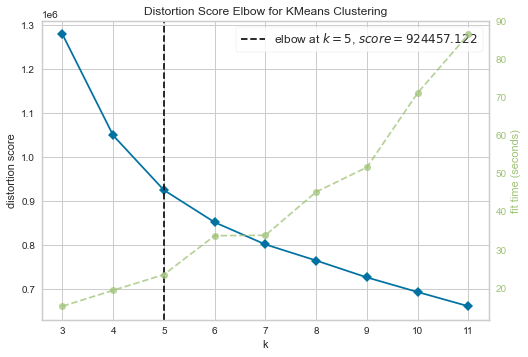

In [32]:
visualizer = KElbowVisualizer(k_means, k=(3, 12))
visualizer.fit(df_subj_abv[['look', 'smell', 'taste', 'feel']])
visualizer.show()
# A peu près 10 min d'éxécution

In [8]:
# On rentre le nombre de clusters donnés par la méthode elbow : 5
k_means = KMeans(n_clusters = 5)
k_means.fit(df_subj_abv[['look', 'smell', 'taste', 'feel']]) #K-means training
abv_pred_subj = k_means.predict(df_subj_abv[['look', 'smell', 'taste', 'feel']])

<ipython-input-15-d1956f6d1a04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subj_abv['label'] = k_means.labels_


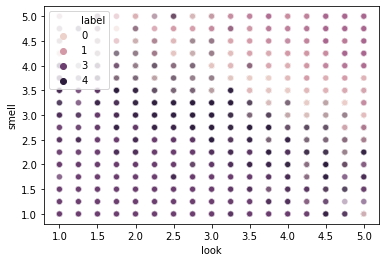

In [15]:
df_subj_abv['label'] = k_means.labels_
p = sns.scatterplot(data=df_subj_abv.sample(10**6), x="look", y="smell", hue = "label",alpha = 0.4)

In [19]:
df_subj_abv[df_subj_abv.label == 2]

,beer_name,beer_style,abv,brewery_id,brewery_name,look,smell,taste,feel,label
id,,,,,,,,,,
82352,Konrads Stout Russian Imperial Stout,Russian Imperial Stout,10.40,18604,Lervig Aktiebryggeri,4.50,4.50,4.50,4.50,2
82352,Konrads Stout Russian Imperial Stout,Russian Imperial Stout,10.40,18604,Lervig Aktiebryggeri,4.75,4.25,5.00,4.75,2
82352,Konrads Stout Russian Imperial Stout,Russian Imperial Stout,10.40,18604,Lervig Aktiebryggeri,4.50,4.50,4.25,4.25,2
82352,Konrads Stout Russian Imperial Stout,Russian Imperial Stout,10.40,18604,Lervig Aktiebryggeri,4.75,4.75,4.50,4.50,2
82352,Konrads Stout Russian Imperial Stout,Russian Imperial Stout,10.40,18604,Lervig Aktiebryggeri,4.50,4.50,4.75,4.50,2
...,...,...,...,...,...,...,...,...,...,...
159905,"La Axarca, Tropical Pale Ale",American Pale Ale (APA),5.00,32852,"La Domadora y El León, Craft Beer Store, Cerve...",4.75,4.50,4.25,4.25,2
344734,TJ Tijuana Mexican Lager,Vienna Lager,5.00,32857,Cerveza Tijuana,5.00,5.00,5.00,5.00,2
139766,Mandril Pale Ale,English Pale Ale,5.40,36918,Mandril Brewing Company,4.00,5.00,4.50,4.50,2


### Clustering sur l'abv
On va utilser directement la colonne abv de df_ml.

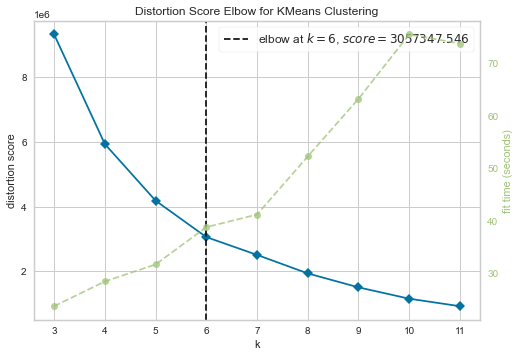

In [37]:
visualizer = KElbowVisualizer(k_means, k=(3, 12))
visualizer.fit(df_ml[['abv']])
visualizer.show()
# A peu près 10 min d'éxécution

In [39]:
# On rentre le nombre de clusters donnés par la méthode elbow : 6
k_means = KMeans(n_clusters = 6)
k_means.fit(df_ml[['abv']]) #K-means training
abv_pred = k_means.predict(df_ml[['abv']])

In [46]:
pred_abv = pd.DataFrame(abv_pred)
df_ml = pd.merge(df_ml, pred_abv, left_index = True, right_index = True)
df_ml = df_ml.rename(columns = {'0_x' : 'cluster_abv'})
df_ml = df_ml.drop(['0_y', 'cluster_subj'], axis = 'columns')
df_ml

,id,beer_name,beer_style,abv,brewery_id,brewery_name,look,smell,taste,feel,cluster_abv,0
0,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.0,3.5,4.0,3.5,4,4
1,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.5,3.0,3.5,4.0,4,4
2,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.0,3.5,4.0,3.5,4,4
3,8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.0,4.0,4.0,4.5,4,4
4,8749,Pleasanton Pale Ale,American Pale Ale (APA),5.3,2199,Main Street Brewery,NaN,NaN,NaN,NaN,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7293076,13450,Jefferson's Golden Ale,English Strong Ale,8.0,450,Yards Brewing Co.,NaN,NaN,NaN,NaN,4,4
7293077,13450,Jefferson's Golden Ale,English Strong Ale,8.0,450,Yards Brewing Co.,NaN,NaN,NaN,NaN,4,4
7293078,13450,Jefferson's Golden Ale,English Strong Ale,8.0,450,Yards Brewing Co.,NaN,NaN,NaN,NaN,4,4
7293079,13450,Jefferson's Golden Ale,English Strong Ale,8.0,450,Yards Brewing Co.,NaN,NaN,NaN,NaN,4,4


## Clustering avec CAH 

Trop de données

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
df_subj_abv

,beer_name,beer_style,abv,brewery_id,brewery_name,look,smell,taste,feel
id,,,,,,,,,
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.00,3.50,4.00,3.50
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.50,3.00,3.50,4.00
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.00,3.50,4.00,3.50
8677,Red Leaf Strong Ale,American Strong Ale,8.6,2199,Main Street Brewery,4.00,4.00,4.00,4.50
8749,Pleasanton Pale Ale,American Pale Ale (APA),5.3,2199,Main Street Brewery,4.00,3.50,3.50,4.00
...,...,...,...,...,...,...,...,...,...
177750,Goldcrest 51,American Adjunct Lager,4.9,40829,Goldcrest Brewing Company,3.50,3.50,4.00,3.50
177750,Goldcrest 51,American Adjunct Lager,4.9,40829,Goldcrest Brewing Company,4.00,4.00,4.00,4.00
177750,Goldcrest 51,American Adjunct Lager,4.9,40829,Goldcrest Brewing Company,3.25,3.25,3.25,3.25


In [25]:
CAH_classifier = AgglomerativeClustering(n_clusters = 5)
y_pred = CAH_classifier.fit(df_subj_abv[['abv']])

MemoryError: Unable to allocate 89.4 TiB for an array with shape (12289863152115,) and data type float64

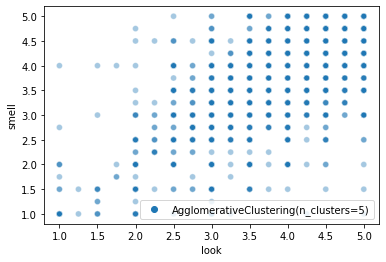

In [20]:
p = sns.scatterplot(data=df_subj_abv.sample(10**4), x="look", y="smell", hue = y_pred ,alpha = 0.4)

## Clustering avec DBSCAN
Avantages : 
- Pas besoin de définir le nombres de clusters (la méthode du coude est longue avec autant de données et sa pertinence repose sur l'intervalle de cluster que l'on lui demande de tester)
- Cette méthode peut repérer le bruit, si quelques bières par exemples sont vraiment très originales (par exemple celles avec un abv vraiment élevé, une odeur particulièrement pestinentielle...)

Cet algorithme possède 2 paramètres qu'il nous faut optimiser avant de modéliser notre clustering.
- epsilon : le rayon du cercle autour de chaque point. Sert à imposer une certaine densité au sein de chaque cluster. On peut le déterminer avec un graphe K-distance, dont le point coude donne la valeur de epsilon. 
- minPoint : le nombre minimum de point qui doivent appartenir au cercle de rayon epsilon afin de définir un point Core (coeur). Il faut au minimum que minPoint > nombre de dimensions du dataset + 1

Inconvénient : Trop long pour cet ensemble de données. 

In [30]:
# Méthode des voisins 
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_subj_abv[['feel', 'taste', 'look', 'smell']].sample(10**4))
distances, indices = nbrs.kneighbors(df_subj_abv[['feel', 'taste', 'look', 'smell']])

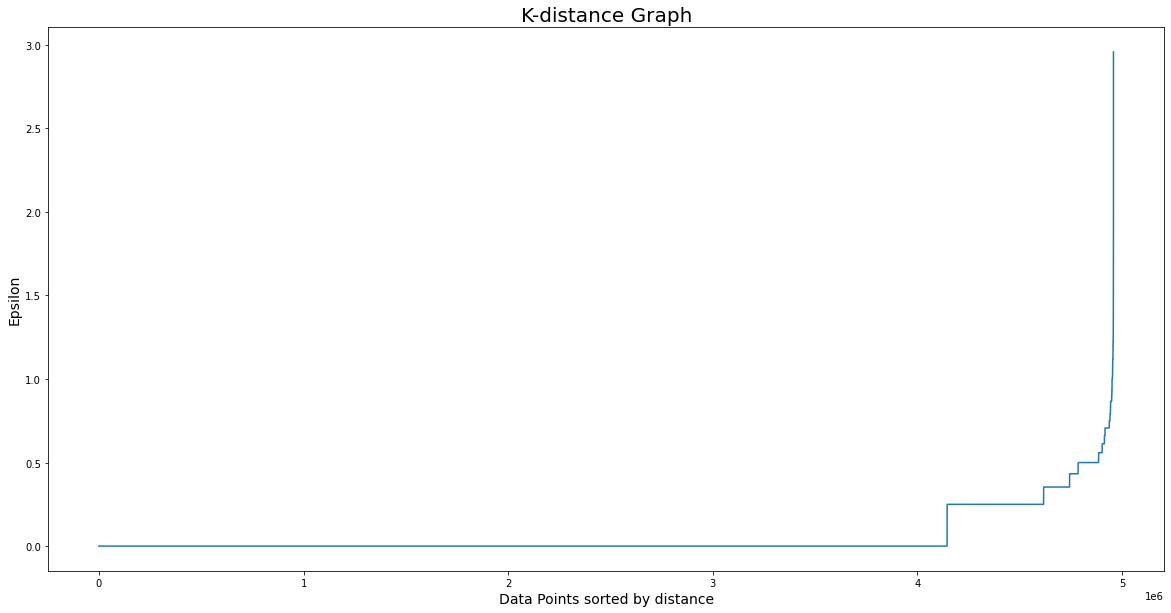

In [52]:
distances = np.sort(distances, axis=0)
distances = distances[:,1] # On fit avec le training set donc le plus proche voisin est lui-même
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [44]:
list_x = np.linspace(0, np.shape(distances)[0], np.shape(distances)[0])

<Figure size 1440x720 with 0 Axes>

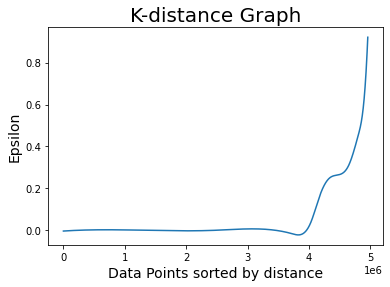

In [51]:
from scipy.interpolate import splrep, splev 

distances = np.sort(distances, axis=0)
plt.figure(figsize=(20,10))
plt.figure() 
bspl = splrep(list_x, distances[:, 1], s = 3000) 
bspl_y = splev(list_x, bspl)  
plt.plot(list_x, bspl_y) 

plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

On procède en échantillonant, l'algorithme étant trop lent pour les 7 millions de lignes
- 0.8 pour un échantillon de 1000 données
- 0.2/0.5 pour 10 000
- 0.4 pour 1 million
---- Plutôt 0.2


### Choix des paramètres de DBSCAN
- On choisit epsilon = (coude de la courbe ci-dessus)


In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps = 0.3, min_samples = 8)
dbscan.fit(df_subj_abv[['look', 'feel', 'taste', 'smell']])

In [ ]:
df_subj_abv['DBSCAN_opt_labels']=dbscan_opt.labels_
df_subj_abv['DBSCAN_opt_labels'].value_counts()

### Juste pour abv 

ne marche pas non plsutrop long

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_ml[['abv']])
distances, indices = nbrs.kneighbors(df_ml[['abv']])
distances = np.sort(distances, axis=0)
distances = distances[:,1] # On fit avec le training set donc le plus proche voisin est lui-même
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps = 0.7, min_samples = 5)
dbscan.fit(df_subj_abv[['abv']])

# Bilan des algorithmes de clustering
On a un très grand nombre de données et ainsi, seul l'algorithme de K-mean sort du lot en nous proposant une répartitions en clusters rapide et fiable. 
- Le clustering hiérarchique est à exclure car la memoryerror que l'on obtient dès que l'on arrive vers 10^5 données est irrémédiable pour l'instant.
- Le DBSCAN a une complexité plus importante que le K-mean, et il faut le laisser tourner au moins 30 minutes (j'ai arrêté le npyau au bout de ce temps). On pourra réitérer un essai si le Kmean ne donne vraiment pas de satisfaction.

## Classification

- Réseaux de neurones
- Random Forest 


## But : 
- Faire ressortir les bières les plus connues de chaque cluster, éventuellement après avoir mis en évidence un individu représentatif de chaque cluster. (Utiliser la table reviews et le nombre d'avis).
- Faire surgir une fenêtre pop-up qui propose de noter cet échantillon de bière + ce qu'il jusge le plus important dans une bière (pour associer un poid à chacun des critères dans l'algorithme de classification).
- Rentrer ces notes dans un algorithme de classification et proposer à l'utilisateur :
    - des bières du même qui pourraient l'intéresser (Apriori)
    - des bières d'autres clusters qui répondent à certains de ses critères ed préférence 
    
## Idées supplémentaires : 
- BDD Beerwulf : plus de clusters
- photos d'étiquettes de bières ? proposer plusieurs et l'utilisateur choisit celles qu'il préfère et cela permet de le classer  

### Création de la fenêtre popup 
A FAIRE à partir de https://python.doctor/page-tkinter-interface-graphique-python-tutoriel

In [24]:
from tkinter import *
from tkinter import ttk

def popup():
    fInfos = Toplevel()		  # Popup -> Toplevel()
    fInfos.title('Infos')
    Button(fInfos, text='Quitter', command=fInfos.destroy).pack(padx=10, pady=10)
    fInfos.transient(jeu) 	  # Réduction popup impossible 
    fInfos.grab_set()		  # Interaction avec fenetre jeu impossible
    jeu.wait_window(fInfos)   # Arrêt script principal

jeu = Tk()					  # Fenêtre principale -> Tk()
jeu.title('Fenêtre principale')
jeu.geometry('300x100')
Button(jeu, text='Ouvrir popup', command=popup).pack(padx=10, pady=10)

jeu.mainloop()				  # Uniquement pour la fenêtre principale 